In [930]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [931]:
train = pd.read_excel(r'Airline_Analysis.xlsx')

In [932]:
df = train.copy()

In [933]:
df.shape

(13354, 25)

In [934]:
X = df.drop(columns='Price')
y = df.loc[:,'Price']

In [935]:
y = pd.DataFrame(y)

In [937]:
m = y['Price'].mean()
print(m)
y = y['Price'].fillna(m)

9087.064120565385


In [939]:
y = pd.DataFrame(y)

In [940]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [941]:
print(X_train.shape)
#print(X_train.isnull().sum())

(10683, 24)


In [942]:
print(X_test.shape)
#print(X_test.isnull().sum())

(2671, 24)


#### Train Data

In [944]:
X_train.head(4)

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,...,Arr_Time_Minutes,Duration_hrs,Duration_mins,Airline Class,Weekday_Journey,Weekday_name_Journey,Year_Journey,Month_Journey,Date_Journey,no_of_takeoff
10100,10100,Multiple carriers,2019-03-27,Delhi,Cochin,DEL → BOM → COK,09:00:00,21:00:00,720,1,...,0,12,0,Economy,2,Wednesday,2019,3,27,300
2369,2369,Air India,2019-05-03,Kolkata,Banglore,CCU → BLR,20:45:00,23:20:00,155,0,...,20,2,35,Economy,4,Friday,2019,5,3,23
5396,5396,Air India,2019-05-21,Delhi,Cochin,DEL → HYD → MAA → COK,07:05:00,09:25:00,1580,2,...,25,26,20,Economy,1,Tuesday,2019,5,21,300
8123,8123,Jet Airways,2019-06-27,Delhi,Cochin,DEL → BOM → COK,02:15:00,12:35:00,620,1,...,35,10,20,Economy,3,Thursday,2019,6,27,308


In [945]:
Airline = X_train['Airline']
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Multiple carriers,SpiceJet,Trujet,Vistara
10100,0,0,0,0,1,0,0,0
2369,1,0,0,0,0,0,0,0
5396,1,0,0,0,0,0,0,0
8123,0,0,0,1,0,0,0,0
6539,0,0,0,1,0,0,0,0


In [946]:
X_train['Source'].value_counts()

Delhi       4558
Kolkata     2819
Banglore    2240
Mumbai       702
Chennai      364
Name: Source, dtype: int64

In [947]:
Source = X_train['Source']
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
10100,0,1,0,0
2369,0,0,1,0
5396,0,1,0,0
8123,0,1,0,0
6539,0,0,0,1


In [948]:
X_train['Destination'].value_counts()

Cochin       4558
Banglore     2819
Delhi        1289
New Delhi     951
Hyderabad     702
Kolkata       364
Name: Destination, dtype: int64

In [949]:
Destination = X_train['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
10100,1,0,0,0,0
2369,0,0,0,0,0
5396,1,0,0,0,0
8123,1,0,0,0,0
6539,0,0,1,0,0


In [950]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

X_train.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [951]:
X_train = pd.concat([X_train,Airline,Source,Destination],axis=1)

In [952]:
X_train = X_train.drop(columns=['Airline','Source','Destination'],axis=1)

In [953]:
X_train = X_train.drop(columns=['index','Date_of_Journey','Dep_Time','Arrival_Time'],axis=1)

In [954]:
X_train.head(5)

,Duration,Total_Stops,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hrs,Duration_mins,Airline Class,Weekday_Journey,...,Vistara,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
10100,720,1,9,0,21,0,12,0,Economy,2,...,0,0,1,0,0,1,0,0,0,0
2369,155,0,20,45,23,20,2,35,Economy,4,...,0,0,0,1,0,0,0,0,0,0
5396,1580,2,7,5,9,25,26,20,Economy,1,...,0,0,1,0,0,1,0,0,0,0
8123,620,1,2,15,12,35,10,20,Economy,3,...,0,0,1,0,0,1,0,0,0,0
6539,85,0,2,55,4,20,1,25,Economy,2,...,0,0,0,0,1,0,0,1,0,0


In [955]:
Class = X_train['Airline Class']
Class = pd.get_dummies(Class, drop_first=True)
Class.head()

,Economy,Premium Economy
10100,1,0
2369,1,0
5396,1,0
8123,1,0
6539,1,0


In [956]:
X_train = pd.concat([X_train,Class],axis=1)

In [957]:
X_train = X_train.drop(columns='Airline Class',axis=1)

In [958]:
X_train = X_train.drop(columns='Weekday_name_Journey',axis=1)

In [959]:
X_train.Year_Journey.value_counts()

2019    10683
Name: Year_Journey, dtype: int64

In [960]:
X_train = X_train.drop(columns='Year_Journey',axis=1)

In [961]:
X_train = X_train.drop(columns='Trujet',axis=1)

In [962]:
X_train.shape

(10683, 30)

#### Test Data

In [963]:
X_test.head(5)

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,...,Arr_Time_Minutes,Duration_hrs,Duration_mins,Airline Class,Weekday_Journey,Weekday_name_Journey,Year_Journey,Month_Journey,Date_Journey,no_of_takeoff
4054,4054,SpiceJet,2019-05-21,Banglore,Delhi,BLR → DEL,09:30:00,12:20:00,170,0,...,20,2,50,Economy,1,Tuesday,2019,5,21,51
1780,1780,IndiGo,2019-06-24,Delhi,Cochin,DEL → LKO → COK,21:50:00,03:35:00,345,1,...,35,5,45,Economy,0,Monday,2019,6,24,317
12405,1722,Jet Airways,2019-06-06,Kolkata,Banglore,CCU → BOM → BLR,21:10:00,10:05:00,775,1,...,5,12,55,Economy,3,Thursday,2019,6,6,228
6006,6006,Jet Airways,2019-06-06,Kolkata,Banglore,CCU → DEL → BLR,09:35:00,14:25:00,1730,1,...,25,28,50,Economy,3,Thursday,2019,6,6,228
12634,1951,Jet Airways,2019-04-01,Kolkata,Banglore,CCU → BOM → BLR,18:55:00,12:00:00,1025,1,...,0,17,5,Economy,0,Monday,2019,4,1,228


In [964]:
X_test.isnull().sum()

index                   0
Airline                 0
Date_of_Journey         0
Source                  0
Destination             0
Route                   0
Dep_Time                0
Arrival_Time            0
Duration                0
Total_Stops             0
Additional_Info         0
Depart_Time_Hour        0
Depart_Time_Minutes     0
Arr_Time_Hour           0
Arr_Time_Minutes        0
Duration_hrs            0
Duration_mins           0
Airline Class           0
Weekday_Journey         0
Weekday_name_Journey    0
Year_Journey            0
Month_Journey           0
Date_Journey            0
no_of_takeoff           0
dtype: int64

In [965]:
Airline = X_test['Airline']
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head()

Source = X_test['Source']
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

Destination = X_test['Destination']
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()


,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
4054,0,1,0,0,0
1780,1,0,0,0,0
12405,0,0,0,0,0
6006,0,0,0,0,0
12634,0,0,0,0,0


In [966]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

X_test.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [967]:
X_test = pd.concat([X_test,Airline,Source,Destination],axis=1)

In [968]:
Class = X_test['Airline Class']
Class = pd.get_dummies(Class, drop_first=True)
Class.head()

,Economy,Premium Economy
4054,1,0
1780,1,0
12405,1,0
6006,1,0
12634,1,0


In [969]:
X_test = pd.concat([X_test,Class],axis=1)

In [970]:
X_test = X_test.drop(columns=['Airline','Source','Destination','index','Date_of_Journey','Dep_Time','Arrival_Time','Airline Class','Weekday_name_Journey','Year_Journey'],axis=1)

In [971]:
X_test.shape

(2671, 30)

In [972]:
X_test.head(5)

,Duration,Total_Stops,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hrs,Duration_mins,Weekday_Journey,Month_Journey,...,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Economy,Premium Economy
4054,170,0,9,30,12,20,2,50,1,5,...,0,0,0,0,1,0,0,0,1,0
1780,345,1,21,50,3,35,5,45,0,6,...,1,0,0,1,0,0,0,0,1,0
12405,775,1,21,10,10,5,12,55,3,6,...,0,1,0,0,0,0,0,0,1,0
6006,1730,1,9,35,14,25,28,50,3,6,...,0,1,0,0,0,0,0,0,1,0
12634,1025,1,18,55,12,0,17,5,0,4,...,0,1,0,0,0,0,0,0,1,0


In [973]:
X_test.columns

Index(['Duration', 'Total_Stops', 'Depart_Time_Hour', 'Depart_Time_Minutes',
       'Arr_Time_Hour', 'Arr_Time_Minutes', 'Duration_hrs', 'Duration_mins',
       'Weekday_Journey', 'Month_Journey', 'Date_Journey', 'no_of_takeoff',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Multiple carriers',
       'SpiceJet', 'Vistara', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi', 'Economy',
       'Premium Economy'],
      dtype='object')

In [974]:
X_train.corr()

,Duration,Total_Stops,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Duration_hrs,Duration_mins,Weekday_Journey,Month_Journey,...,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Economy,Premium Economy
Duration,1.000000,0.739056,0.005311,-0.010350,0.056309,-0.069378,0.999448,-0.091312,-0.012343,0.006796,...,0.294060,0.127022,-0.229674,0.294060,-0.343874,-0.229674,-0.186283,0.004533,0.012338,-0.006521
Total_Stops,0.739056,1.000000,-0.063013,0.000118,0.042388,-0.105070,0.740815,-0.132450,-0.036320,0.045011,...,0.486194,0.038978,-0.257145,0.486194,-0.454279,-0.257145,-0.230331,-0.014655,-0.000616,-0.002810
Depart_Time_Hour,0.005311,-0.063013,1.000000,-0.031828,0.003463,0.064040,0.006212,-0.027612,-0.019794,0.035595,...,-0.124119,0.153986,-0.003961,-0.124119,0.011152,-0.003961,-0.022921,-0.017457,0.023491,-0.023635
Depart_Time_Minutes,-0.010350,0.000118,-0.031828,1.000000,0.048061,-0.019282,-0.013355,0.091210,0.011879,-0.067006,...,-0.074386,-0.030270,0.033832,-0.074386,-0.004987,0.033832,0.061782,0.112950,-0.008646,-0.000264
Arr_Time_Hour,0.056309,0.042388,0.003463,0.048061,1.000000,-0.149339,0.060253,-0.124337,0.000623,-0.006442,...,-0.003524,0.053298,-0.028704,-0.003524,-0.038508,-0.028704,-0.018397,0.004374,-0.008016,0.012490
Arr_Time_Minutes,-0.069378,-0.105070,0.064040,-0.019282,-0.149339,1.000000,-0.074340,0.156297,0.030819,-0.107581,...,-0.211801,0.116069,0.079174,-0.211801,0.099263,0.079174,-0.029175,0.024376,-0.006958,0.003071
Duration_hrs,0.999448,0.740815,0.006212,-0.013355,0.060253,-0.074340,1.000000,-0.124332,-0.013228,0.008159,...,0.297992,0.126328,-0.228259,0.297992,-0.349807,-0.228259,-0.182376,0.001844,0.012361,-0.006586
Duration_mins,-0.091312,-0.132450,-0.027612,0.091210,-0.124337,0.156297,-0.124332,1.000000,0.027864,-0.041603,...,-0.149623,0.007118,-0.017647,-0.149623,0.214997,-0.017647,-0.097088,0.080134,-0.002022,0.002644
Weekday_Journey,-0.012343,-0.036320,-0.019794,0.011879,0.000623,0.030819,-0.013228,0.027864,1.000000,-0.077041,...,-0.047785,0.026428,-0.015653,-0.047785,-0.023489,-0.015653,0.000548,0.082229,-0.019242,0.010245
Month_Journey,0.006796,0.045011,0.035595,-0.067006,-0.006442,-0.107581,0.008159,-0.041603,-0.077041,1.000000,...,0.136667,0.086213,-0.039724,0.136667,0.097906,-0.039724,0.011983,-0.455849,0.059908,-0.050900


<AxesSubplot:>

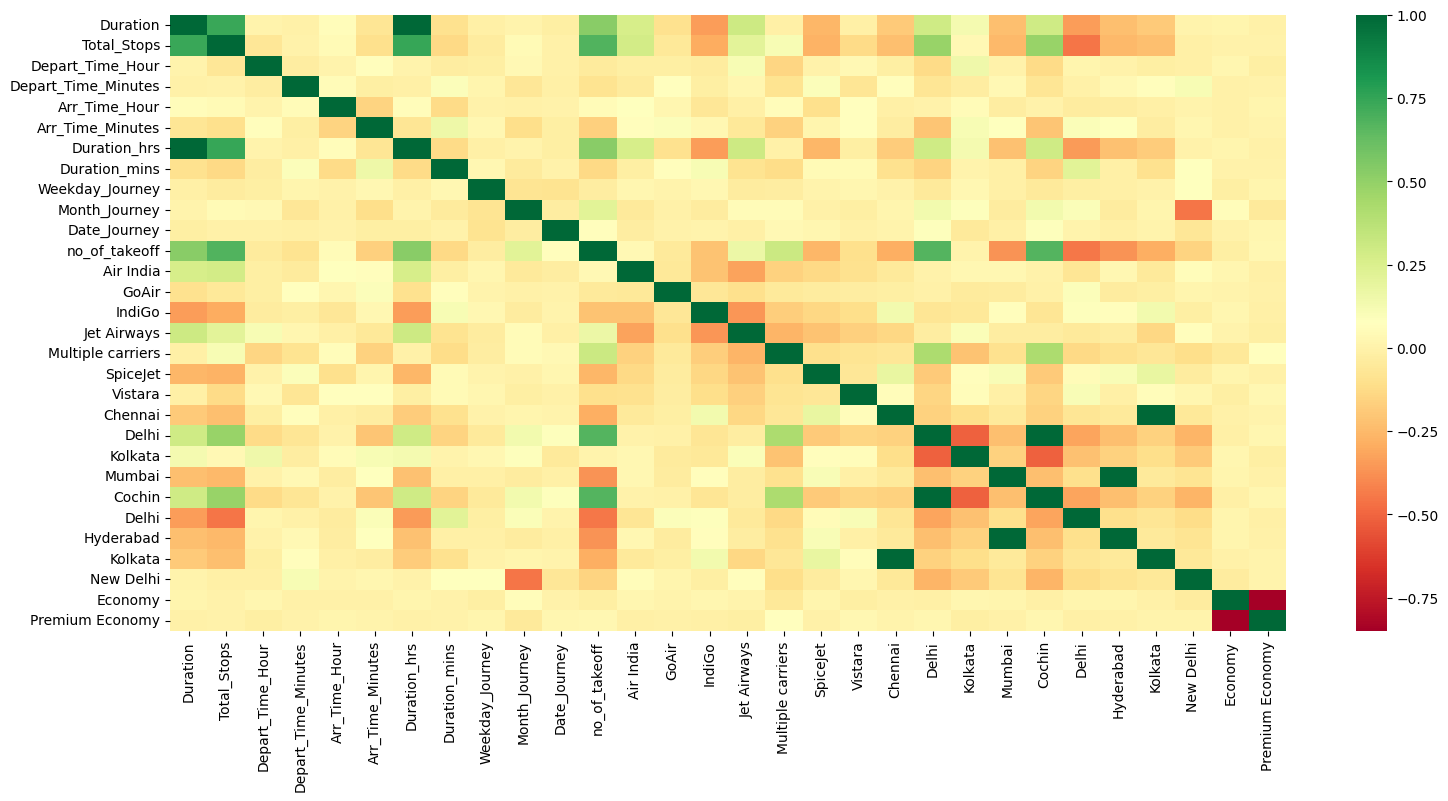

In [975]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
sns.heatmap(X_train.corr(), annot=False, cmap="RdYlGn")

In [976]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [977]:
y_pred = reg_rf.predict(X_test)

In [978]:
reg_rf.score(X_test, y_test)

0.5345338470014589